<a href="https://colab.research.google.com/github/Torsha-Sett/Object-Detection/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2

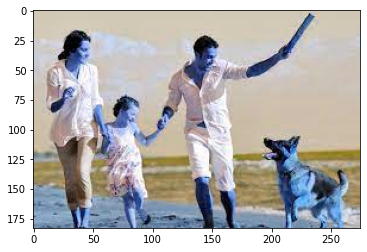

In [4]:
import matplotlib.pyplot as plt
img = cv2.imread("/content/sample_data/images.jfif")
plt.imshow(img)

In [ ]:
classNames=[]
filename='coco.names'
with open(filename, "rt") as f:
    classNames = f.read().rstrip('n').split('n')

configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = 'frozen_inference_graph.pb'

In [ ]:
net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

<dnn_Model 0x7f0be1532330>

In [ ]:
#classIds, confs, bbox = net.detect(img,confThreshold=thres)
classIndex, confidence, bbox = net.detect(img,confThreshold=0.5)

error: ignored

In [ ]:


if len(classIds) != 0:
  for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
    cv2.rectangle(img,box,color=(0,255,0),thickness=2)
    cv2.putText(img,classNames[classId-1].upper(),(box[0]+10,box[1]+30),
    cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    cv2.putText(img,str(round(confidence*100,2)),(box[0]+200,box[1]+30),
    cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

cv2.imshow('Output',img)
cv2.waitKey(1)

error: ignored

True

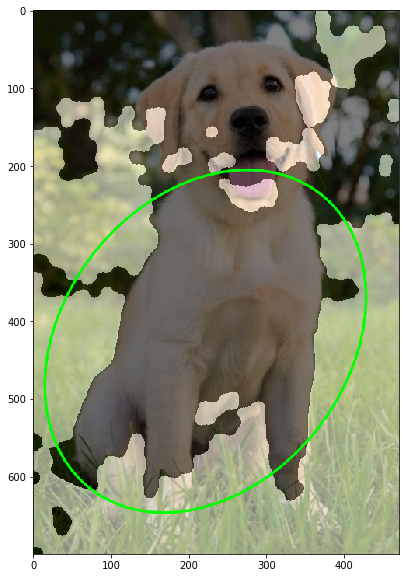

In [ ]:
img = cv2.imread('dog_colour.jpg')
after_img = detect_object(img)
cv2.imwrite('detect_dog.jpg', after_img)